In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mipt-bio-2025/fashion-mnist-testn/fmnist_test.csv
/kaggle/input/mipt-bio-2025/fashion-mnist-testn/sample_submission.csv
/kaggle/input/mipt-bio-2025/fashion-mnist-testn/fmnist_train.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [6]:
# Загрузка данных 
train_path = '/kaggle/input/mipt-bio-2025/fashion-mnist-testn/fmnist_train.csv'
test_path = '/kaggle/input/mipt-bio-2025/fashion-mnist-testn/fmnist_test.csv'
submission_path = '/kaggle/input/mipt-bio-2025/fashion-mnist-testn/sample_submission.csv'

In [7]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

In [ ]:
# Проверка на пустные значения и вывод размера трейна и теста
result = {
    "train_shape": train_df.shape,
    "test_shape": test_df.shape,
    "train_nan_count": train_df.isna().sum().sum(),
    "test_nan_count": test_df.isna().sum().sum()
}

result

{'train_shape': (17040, 786),
 'test_shape': (10000, 785),
 'train_nan_count': 424,
 'test_nan_count': 0}

В fmnist_train.csv оказались пропущенные значения — это значит, что у некоторых пикселей нет значения яркости, и они представлены как NaN. Keras (или любая другая нейросеть) не умеет с ними работать.

In [10]:
# Подготовка признаков
train_df = train_df.fillna(0)  # заполняем NaN нулям, так как это не вносит шум и не искажает данные
X = train_df.drop(columns=["label", "Id"]).values / 255.0  # нормализация
y = to_categorical(train_df["label"].values, num_classes=10)

X_test = test_df.drop(columns=["Id"]).values / 255.0  # нормализация
test_ids = test_df["Id"].values

In [11]:
# Разделение на обучение и валидацию 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
# Модель Keras
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [18]:
# Компиляция
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Обучение
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val),
    verbose=2
)

Epoch 1/10
120/120 - 3s - 28ms/step - accuracy: 0.6748 - loss: 0.8987 - val_accuracy: 0.8058 - val_loss: 0.5721
Epoch 2/10
120/120 - 1s - 6ms/step - accuracy: 0.7983 - loss: 0.5659 - val_accuracy: 0.8257 - val_loss: 0.4876
Epoch 3/10
120/120 - 1s - 6ms/step - accuracy: 0.8243 - loss: 0.4960 - val_accuracy: 0.8398 - val_loss: 0.4428
Epoch 4/10
120/120 - 1s - 6ms/step - accuracy: 0.8367 - loss: 0.4498 - val_accuracy: 0.8480 - val_loss: 0.4245
Epoch 5/10
120/120 - 1s - 6ms/step - accuracy: 0.8469 - loss: 0.4211 - val_accuracy: 0.8638 - val_loss: 0.3913
Epoch 6/10
120/120 - 1s - 6ms/step - accuracy: 0.8519 - loss: 0.4026 - val_accuracy: 0.8480 - val_loss: 0.4227
Epoch 7/10
120/120 - 1s - 6ms/step - accuracy: 0.8595 - loss: 0.3827 - val_accuracy: 0.8603 - val_loss: 0.3972
Epoch 8/10
120/120 - 1s - 6ms/step - accuracy: 0.8602 - loss: 0.3767 - val_accuracy: 0.8550 - val_loss: 0.3907
Epoch 9/10
120/120 - 1s - 6ms/step - accuracy: 0.8659 - loss: 0.3632 - val_accuracy: 0.8656 - val_loss: 0.3762


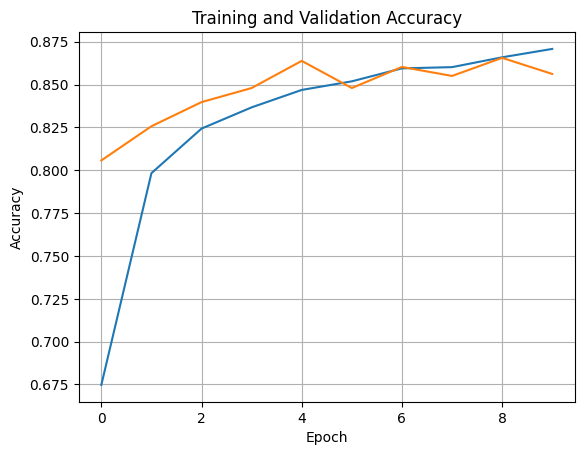

In [22]:
# Визуализация метрики
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

In [23]:
# Вывод метрик
print(f"Метрика train accuracy = {history.history['accuracy'][-1]:.4f}")
print(f"Метрика val accuracy = {history.history['val_accuracy'][-1]:.4f}")

Метрика train accuracy = 0.8708
Метрика val accuracy = 0.8562


In [24]:
# Предсказание
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#submission["label"] = y_pred_classes
#submission.to_csv("/kaggle/working/submission.csv", index=False)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [25]:
y_pred

array([[4.8364016e-01, 1.4604743e-05, 6.5908296e-04, ..., 1.2459136e-06,
        1.2559023e-04, 5.2282521e-06],
       [8.1972784e-09, 9.9999923e-01, 2.3193733e-10, ..., 8.4077175e-14,
        6.9442219e-10, 9.6417991e-13],
       [2.5747258e-02, 1.8787348e-03, 6.5487671e-01, ..., 2.4131691e-04,
        6.1474810e-03, 7.5389683e-04],
       ...,
       [3.9197027e-12, 1.6380903e-13, 5.4161564e-11, ..., 2.6489280e-12,
        9.9999994e-01, 1.1761957e-14],
       [6.6849398e-03, 6.8686873e-05, 3.4229057e-03, ..., 1.0276957e-04,
        9.5391208e-01, 9.2626212e-04],
       [2.3486137e-02, 9.6002840e-02, 8.2524888e-02, ..., 2.6973736e-04,
        6.2062461e-03, 4.0659579e-04]], dtype=float32)